In [92]:
import qutip
# first step was to implement this to make sure notebook runs correctly and can reproduce plots
# https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v4/lectures/Lecture-10-cQED-dispersive-regime.ipynb

In [93]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Options, about, basis, coherent, correlation, destroy,
                   expect, mesolve, ptrace, qeye, sigmax, sigmaz,
                   spectrum_correlation_fft, tensor, wigner)

%matplotlib widget
from tqdm import tqdm
import numpy as np

In [94]:
#TODO add class model params physical, noise included, physical can't chagen it noise cavity and qubit frequency
#TODO make many physical models and have experiment interface with it
#TODO mvc model view controller programming
#TODO experiment class instantiate with model

In [95]:
#initiate and hold physical properties of system
#meant to be passed to experiment class to be worked on
#TODO change automatic params to be realistic, this is Rebecca making up numbers
class Model: 
    
    def __init__(self, cavityFreq = 3, cavityDecay = .1, qubitFreq = 10, qubitDecay = .01, noise = 0):
        self.cavityFreq = cavityFreq
        self.cavityDecay = cavityDecay
        self.qubitFreq = qubitFreq
        self.qubitDecay = qubitDecay
        self.noise = noise
    
    
    

In [ ]:



def dispersive_readout():
    N = 10
    wr, wq, chi = 7.5*np.pi, 5.0*np.pi, 0.002*2*np.pi
    psi0 = tensor(basis(N, 0), (basis(2, 0)).unit())
    tlist = np.linspace(0, 250,100)

    # cavity operators
    a = tensor(destroy(N), qeye(2))

    # atomic operators
    sm = tensor(qeye(N), destroy(2))
    sz = tensor(qeye(N), sigmaz())

    Id = tensor(qeye(N), qeye(2))
    
    qubitH = sm.dag() + sm

    cavH = a.dag() + a

    cavityFrequency_list = np.linspace(-2*wr, 2*wr, 100)
    qubit_bool = 1

    def qub_coeff(self, t, args):
        wd = wq
        return qubit_bool * self.qubDrivAmp * np.cos(wd * t) #np.exp(-((t-50) / 50) ** 2) 
    
    def cav_coeff(self, t, args):
        wd = self.args['wd']
        return self.cavDrivAmp * np.cos(wd * t) #np.exp(-((t-50) / 50) ** 2) * 

    # H0 is the time-independent part
    H0 = wr * (a.dag() * a + Id / 2.0) + (wq / 2.0) * sz - (chi/2) *(a.dag() * a ) * sz

    H = [H0, [qubitH, qub_coeff], [cavH, cav_coeff]]

    for frequency in cavityFrequency_list:
        res = mesolve(H, psi0, tlist, [], [], options=Options(nsteps=5000), args={'wd':frequency})

        self.nc_list = expect(self.nc, res.states)
        self.nq_list = expect(self.nq, res.states)
        
        expectedNC_list.append(self.nc_list[-1])
        expectedNQ_list.append(self.nq_list[-1])

     #meant to use with outputs from mesolve, x-axis driving freq, y-axis N number
    def plotFreq_N(self, freq_list, NC_list, NQ_list):
        frequencies = freq_list
        expectedNC_list = NC_list
        expectedNQ_list = NQ_list

        fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12, 4))
        
        ax.plot(frequencies, expectedNC_list, "b--", linewidth=2, label="expected Cavity N", marker = 'o')
        ax.plot(frequencies, expectedNQ_list, "r", linewidth=2, label="expected Qubit N", marker = 'o')
        ax.set_ylabel("N", fontsize=16)
        ax.set_xlabel("Drive Frequency", fontsize=16)
        ax.legend()

        fig.tight_layout()



    
    

    
    

In [96]:
class Experiment:
    # N number of initial photons
    #q qubit drive amp qubDrivAmp
    #c cavity Drive amp cavDrivAmp
    #decayQ is decay operator on the qubit
    #decayC is decay operator on the cavity TODO
    N = 10
    wr, wq, chi = 4.0*np.pi, 4.0*np.pi, 0.025*2*np.pi
    args = {'wd':wq+.1*wq}
    tlist = np.linspace(0, 250,100)

    #todo clean up so not as messy looking, below is all variables

    delta = abs(wr - wq)  # detuning
    g = np.sqrt(delta * chi)  # coupling strength that is consistent with chi

    # cavity operators
    a = tensor(destroy(N), qeye(2))
    nc = a.dag() * a
    xc = a + a.dag()

    # atomic operators
    sm = tensor(qeye(N), destroy(2))
    sz = tensor(qeye(N), sigmaz())
    sx = tensor(qeye(N), sigmax())
    nq = sm.dag() * sm
    xq = sm + sm.dag()

    Id = tensor(qeye(N), qeye(2))
    psi0 = tensor(basis(N, 0), (basis(2, 0)).unit())
       
    # H0 is the time-independent part
    H0 = wr * (a.dag() * a + Id / 2.0) + (wq / 2.0) * sz - (chi/2) *(a.dag() * a ) * sz

    # H1 + are the time-dependent terms
    #qubit
    qubitH = sm.dag() + sm

    # collapse operators for qubit and cavity
    decayQ = .0001
    decayC = .1
    c_ops = [np.sqrt(decayQ) * sm, np.sqrt(decayC)*a] #decays on qubit



    #Can pass N, qubDrivAmp, cavDrivAmp
    def __init__(self, q = 1, c = 2 ) -> None:
        self.qubDrivAmp = q
        self.cavDrivAmp = c
        # sqrt{nbar} = e_c/sqrt{kappa}
        assert self.qubDrivAmp/np.sqrt(self.decayQ) <=1

   

    # NOTE this does not use RWA 

    # TODO add ramp up time using tanh
    #TODO make param for h1 qubitDriveAmp, h2 cavity
    #VNApower
    def qub_coeff(self, t, args):
        wd = self.args['wd']
        return 0* self.qubDrivAmp * np.cos(wd * t) #np.exp(-((t-50) / 50) ** 2) 

    
    # H1 + are the time-dependent terms
    #cavity
    cavH = a.dag() + a

    # NOTE this does not use RWA 
    def cav_coeff(self, t, args):
        wd = self.args['wd']
        return self.cavDrivAmp * np.cos(wd * t) #np.exp(-((t-50) / 50) ** 2) * 

    #TODO question how to seperate decay on qubit and cavity, seem to be interlinked rn
    #TODO move decays to model
    #decay on qubit update
    def setDecayQ(self, d):
        self.decayQ = d
        self.c_ops = [np.sqrt(self.decayQ) * self.sm, np.sqrt(self.decayC) * self.a] #recalc decay on qubit

    def setDecayC(self, c):
        self.decayC = c
        self.c_ops = [np.sqrt(self.decayQ) * self.sm, np.sqrt(self.decayC) * self.a] #recalc decay on qubit

    def converge(self, f_list, maxDiff_percent = 1) -> bool:
        """maxDiff is percent of how far off the values can be, returns true if close enough, false if not"""
        minVal = min(f_list)
        maxVal = max(f_list)

        diffCheck = maxVal - minVal

        if diffCheck > (maxDiff_percent *.01 * maxVal):
            return False
        else:
            return True

    #meant to use with outputs from mesolve, x-axis driving freq, y-axis N number
    def plotFreq_N(self, freq_list, NC_list, NQ_list):
        frequencies = freq_list
        expectedNC_list = NC_list
        expectedNQ_list = NQ_list

        fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12, 4))
        
        ax.plot(frequencies, expectedNC_list, "b--", linewidth=2, label="expected Cavity N", marker = 'o')
        ax.plot(frequencies, expectedNQ_list, "r", linewidth=2, label="expected Qubit N", marker = 'o')
        ax.set_ylabel("N", fontsize=16)
        ax.set_xlabel("Drive Frequency", fontsize=16)
        ax.legend()

        fig.tight_layout()
        
    #solves for testNumber diff frequencies in the given range and plots the last value from mesolve
    #uses whatever model values already have, or default model values
    def masterSolve(self, startFreq = 30, endFreq=50, testNumber=20 ):
        frequencies_list = self.generateTestFreq(startFreq, endFreq, testNumber)
        expectedNC_list  = []
        expectedNQ_list = []

        for i in tqdm(range(testNumber)):

            self.args['wd'] = frequencies_list[i]

            H = [self.H0, [self.qubitH, self.qub_coeff], [self.cavH, self.cav_coeff]]

            res = mesolve(H, self.psi0, self.tlist, self.c_ops, [], options=Options(nsteps=5000), args=self.args)

            self.nc_list = expect(self.nc, res.states)
            self.nq_list = expect(self.nq, res.states)
            
            expectedNC_list.append(self.nc_list[-1])
            expectedNQ_list.append(self.nq_list[-1])

        self.plotFreq_N(frequencies_list, expectedNC_list, expectedNQ_list)
            

          
    #m is Model, can pass in model to use in calculations
    #solves for testNumber diff frequencies in the given range and plots the last value from mesolve
    def masterSolve_model(self, m, startFreq = 30, endFreq=50, testNumber=20 ):
        frequencies = self.generateTestFreq(startFreq, endFreq, testNumber)
        expectedNC_list  = []
        expectedNQ_list = []

        self.setDecayC(m.cavityDecay)
        self.setDecayQ(m.qubitDecay)

        for i in tqdm(range(testNumber)):

            self.args['wd'] = frequencies[i]

            H = [self.H0, [self.qubitH, self.qub_coeff], [self.cavH, self.cav_coeff]]

            res = mesolve(H, self.psi0, self.tlist, self.c_ops, [], options=Options(nsteps=5000), args=self.args)

            self.nc_list = expect(self.nc, res.states)
            self.nq_list = expect(self.nq, res.states)

            cavityValid = self.converge(self.nc_list[-5:], 30) #checks for 30% convergence
            qubitValid = self.converge(self.nq_list[-5:], 30)

            #if either didn't converge, do not show plot
            if cavityValid and qubitValid:
                expectedNC_list.append(self.nc_list[-1])
                expectedNQ_list.append(self.nq_list[-1])
            else: #rerun simulation to converge
                #TODO find which params to adjust for simul rerun
                print('Did not converge, rerun simulation')
                print("start and end freq: " + str(startFreq) + " " + str(endFreq))
                break

        if cavityValid and qubitValid and (i == testNumber-1):
            #check if enough testnumbers
            if testNumber > 19:
                self.plotFreq_N(frequencies, expectedNC_list, expectedNQ_list)
            else: #if converged but not enough testnumbers rerun
                self.masterSolve_model(m, startFreq, endFreq, 20) 
        else:
            #update start and end freq?, how to choose greater or lower?
            if i != 0:
                freq_scalar = 1.2
                startFreq = startFreq
                endFreq = 1.8 * (endFreq - startFreq)
                self.masterSolve_model(m, startFreq, endFreq, 5) 
            else:
                freq_scalar = 1.05
                startFreq = freq_scalar * startFreq
                endFreq = freq_scalar * endFreq
                self.masterSolve_model(m, startFreq, endFreq, 5) 

        
   
    #generate list of test frequencies to use in mastersolve to model drive frequencies
    def generateTestFreq(self, startFreq, endFreq, testNumber):
        startFreq = startFreq
        endFreq = endFreq
        increment = (endFreq-startFreq)/testNumber

        freqRange = []
        for i in range(testNumber):
           freqRange.append(startFreq + (i*increment))
        
        return freqRange
        

    
    #plots Time vs N from nc_list and nq_list
    def plotN_time(self):
        fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12, 4))
        
        ax.plot(self.tlist, self.nc_list, "r", linewidth=2, label="cavity")
        ax.plot(self.tlist, self.nq_list, "b--", linewidth=2, label="qubit")
        ax.set_ylim(0, 7)
        ax.set_ylabel("n", fontsize=16)
        ax.set_xlabel("Time (ns)", fontsize=16)
        ax.legend()

        fig.tight_layout()

    #calls mesolve and plot     
    def solveshow(self):
        self.masterSolve()
        self.plotN_time()



    

  0%|          | 0/10 [00:06<?, ?it/s]


Did not converge, rerun simulation
start and end freq: 8 16


  0%|          | 0/5 [00:06<?, ?it/s]


Did not converge, rerun simulation
start and end freq: 8.4 16.8


  0%|          | 0/5 [00:04<?, ?it/s]


Did not converge, rerun simulation
start and end freq: 8.82 17.64


  0%|          | 0/5 [00:04<?, ?it/s]


Did not converge, rerun simulation
start and end freq: 9.261000000000001 18.522000000000002


  0%|          | 0/5 [00:04<?, ?it/s]


Did not converge, rerun simulation
start and end freq: 9.724050000000002 19.448100000000004


  0%|          | 0/5 [00:04<?, ?it/s]


Did not converge, rerun simulation
start and end freq: 10.210252500000003 20.420505000000006


 60%|██████    | 3/5 [00:17<00:11,  5.92s/it]


Did not converge, rerun simulation
start and end freq: 10.720765125000003 21.441530250000007


 80%|████████  | 4/5 [00:22<00:05,  5.53s/it]


Did not converge, rerun simulation
start and end freq: 10.720765125000003 19.297377225000005


100%|██████████| 20/20 [01:37<00:00,  4.88s/it]


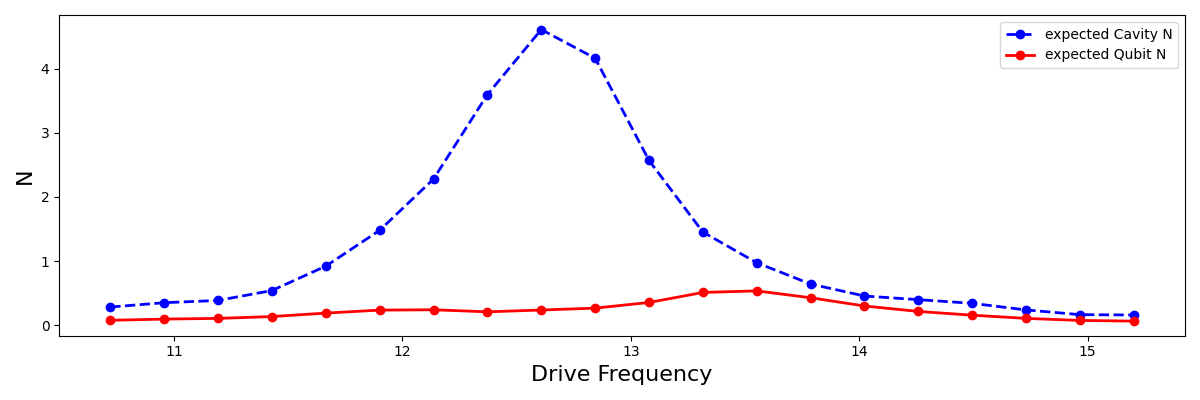

In [97]:

#master solve now will automatically cycle through different frequencies and output plot with the last value of the mesolve equation
e = Experiment()

#model init( cavityFreq = 3, cavityDecay = .1, qubitFreq = 10, qubitDecay = .01, noise = 0)
#example of testing multiple models with experiment class
m1 = Model()
m1_d = Model(3, .8, 10, .1) #m1 with higher decay
m2 = Model(4, .5, 20, .1, 0)
m3 = Model(45, .7, 76, .4, 0 )


#e.masterSolve_model(m1, 8, 16, 50)
e.masterSolve_model(m1_d, 8, 16, 10)
#e.masterSolve_model(m2, 8, 9, 10) #not converge ex
#Note: about 4-6 seconds for each iter of mesolve to run

# todo  
# finish converge
# do automated function to rerun until converges
# clean up documentation


In [383]:
N =  10 # should be much larger than average photon occupancy (>x10)
# but as increase N sim will be slower -> decrease drive amplitudes
# or to increase kappa for faster decay

wr = 2.0 * 2 * np.pi  # resonator frequency
wq = 2.0 * 2 * np.pi  # qubit frequency
chi = 0.025 * 2 * np.pi  # parameter in the dispersive hamiltonian

#initial vals, adjusted by function
qubDrivAmp = 6
cavDrivAmp = 8

tlist = np.linspace(0, 250, 100)

delta = abs(wr - wq)  # detuning
g = np.sqrt(delta * chi)  # coupling strength that is consistent with chi

In [384]:
# compare detuning and g, the first should be much larger than the second
delta / (2 * np.pi), g / (2 * np.pi)

(0.0, 0.0)

In [385]:
# cavity operators
a = tensor(destroy(N), qeye(2))
nc = a.dag() * a
xc = a + a.dag()

# atomic operators
sm = tensor(qeye(N), destroy(2))
sz = tensor(qeye(N), sigmaz())
sx = tensor(qeye(N), sigmax())
nq = sm.dag() * sm
xq = sm + sm.dag()

Id = tensor(qeye(N), qeye(2))

In [386]:
# dispersive hamiltonian
# H0 is the time-independent part
H0 = wr * (a.dag() * a + Id / 2.0) + (wq / 2.0) * sz + chi *(a.dag() * a + Id / 2) * sz
# H0 = wr * (a.dag() * a) + wq * (sm.dag() * sm) + g* (a.dag()*sm + a*sm.dag())

# H1 + are the time-dependent terms
#qubit
qubitH = sm.dag() + sm

# NOTE this does not use RWA 

# TODO add ramp up time using tanh
#TODO make param for h1 qubitDriveAmp, h2 cavity
#VNApower
def qub_coeff(t, args):
    wd = args['wd']
    return qubDrivAmp * np.cos(wd * t) #np.exp(-((t-50) / 50) ** 2) 


# H1 + are the time-dependent terms
#cavity
cavH = a.dag() + a

# NOTE this does not use RWA 
def cav_coeff(t, args):
    wd = args['wd']
    return cavDrivAmp * np.cos(wd * t) #np.exp(-((t-50) / 50) ** 2) * 

# TODO add collapse operators
decayQ = .01
c_ops = [np.sqrt(decayQ) * sm]

H = [H0, [qubitH, qub_coeff], [cavH, cav_coeff]]

In [387]:
psi0 = tensor(basis(N, 0), (basis(2, 0)).unit())

In [388]:

args = {'wd': wq+.1*wq}
res = mesolve(H, psi0, tlist, c_ops, [], options=Options(nsteps=4000), args=args)



In [389]:
nc_list = expect(nc, res.states)
nq_list = expect(nq, res.states)

In [390]:
# TODO plot steady state n value in qubit drive frequency domain

In [391]:
print(nc_list[-1])

3.8929017049877115


In [392]:
print(nc_list[-1])

3.8929017049877115
